In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'C:\Users\DeLL\Documents\Python Files\Stats and ML by Garvit\ML\Linear Regression\Linear Regression\Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
x1 = df['Radio']
y1 = df['Sales']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<Axes: >

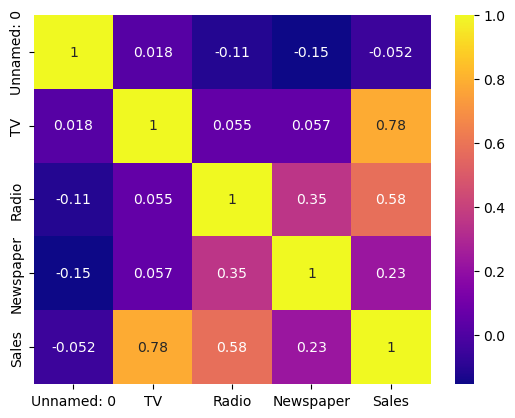

In [6]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size=0.7,test_size=0.3)

### Adding a Constant

In [10]:
x1_train_sm = sm.add_constant(x1_train)

### Fitting the regression model using OLS (of SM)

In [15]:
lr = sm.OLS(y1_train,x1_train_sm).fit()

In [16]:
lr.params

const    9.245087
Radio    0.211298
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     86.91
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.48e-16
Time:                        22:41:40   Log-Likelihood:                -390.53
No. Observations:                 140   AIC:                             785.1
Df Residuals:                     138   BIC:                             790.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2451      0.604     15.312      0.000       8.051      10.439
Radio          0.2113      0.023      9.323      0.000       0.166       0.256
==============================================================================
Omnibus:                       27.154   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.035
Skew:                          -1.043   Prob(JB):                     5.51e-09
Kurtosis:                       4.474   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from sklearn.metrics import r2_score

In [19]:
y1_train_pred = lr.predict(x1_train_sm)

In [20]:
r1 = r2_score(y1_train,y1_train_pred)
r1

0.38643428988076045

In [22]:
adjr1 = 1-((1-r1)*(199)/(198))
adjr1

0.38333547316298644

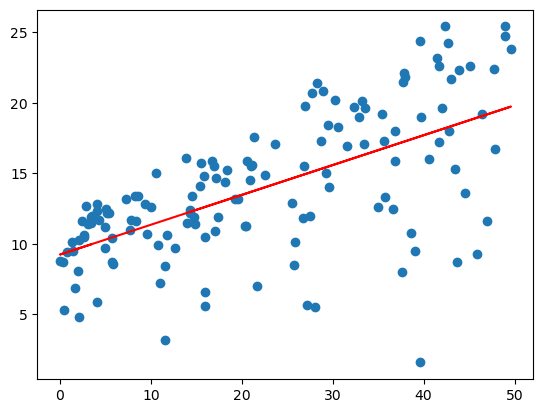

In [23]:
plt.scatter(x1_train,y1_train)
plt.plot(x1_train, 9.245087 + 0.211298*x1_train, 'r')
plt.show()

### Using SKlearn

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lrsk = LinearRegression()

In [48]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x1,y1,train_size=0.7,test_size=0.3)

In [49]:
x2_train

182     5.7
133    33.5
130    39.6
175    48.9
110     8.2
       ... 
171    20.9
108     0.4
100     4.3
198    42.0
4      10.8
Name: Radio, Length: 140, dtype: float64

In [50]:
y2_train 

182     8.7
133    19.6
130     1.6
175    27.0
110    13.4
       ... 
171    14.5
108     5.3
100    11.7
198    25.5
4      12.9
Name: Sales, Length: 140, dtype: float64

In [51]:
x2_train.values

array([ 5.7, 33.5, 39.6, 48.9,  8.2,  2.6, 49.6,  5.1,  3.5, 22.5, 10.6,
       21. , 16.9, 36.6, 11.8, 46.4, 26.7, 29.5,  3.7, 29.9, 21.7, 27.7,
       18.1, 25.8, 36.5, 38.6, 39.6, 28.7, 16.7, 32.3, 10. , 30.6,  5.7,
        5.7,  2.4, 49.4,  7.1, 10.8,  8.4, 39.7, 37.7, 20.1, 27.5, 42.7,
       36.8,  5.8, 26.8, 35.1, 20.5, 32.9,  5.4, 28.1, 10.1, 20.3, 12.6,
       25.5, 11. , 28.8, 14.7, 11.6,  0.8, 41.1, 17. , 20. , 32.8, 19.6,
        4.1, 18.4,  1.5, 30.2, 45.9, 41.7, 48.9,  8.6, 21.3, 45.1, 24.6,
       35.8, 18.4, 15.8, 15.5, 40.3, 38.9,  3.5, 34.6,  9.9, 49. , 27.2,
       12. , 43. ,  2.1, 13.9, 31.6, 16. , 46.8, 43.7, 27.7, 43. , 35.6,
       33. , 43.9, 27.1, 26.7, 14.8, 41.5, 28.5, 29.3,  1.9, 16. , 36.3,
       49. ,  0.3, 14.3, 36.9,  3.4, 24. , 37.6, 23.3, 25.9, 39.3, 34.3,
       43.8,  5.2,  2.3, 27.5, 19.2, 46.2, 12.1,  7.6, 47.7,  7.3,  4.9,
       42.3,  2.6, 26.9, 20.9,  0.4,  4.3, 42. , 10.8])

In [52]:
l2 = lrsk.fit(x2_train.values.reshape(-1,1),y2_train.values.reshape(-1,1))

In [53]:
l2.coef_

array([[0.21373618]])

In [54]:
l2.intercept_

array([9.15926805])

In [55]:
y2_train_pred = lrsk.predict(x2_train.values.reshape(-1,1))
y2_test_pred = lrsk.predict(x2_test.values.reshape(-1,1))

In [56]:
rscore_sk = r2_score(y2_train,y2_train_pred)
rscore_sk

0.320334646302865

In [57]:
rscore_sk2 = r2_score(y2_test,y2_test_pred)
rscore_sk2

0.3511924086160274

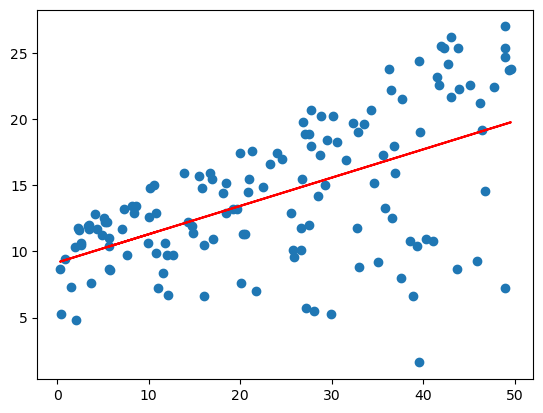

In [59]:
plt.scatter(x2_train,y2_train)
plt.plot(x2_train,9.15926805 + 0.21373618*x2_train, 'r')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\DeLL\Documents\Python Files\Stats and ML by Garvit\ML\Linear Regression\Linear Regression\Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
xf = df.iloc[:,[1,2,3]]
yf = df.Sales

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
xf_train,xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size=0.3,train_size=0.7)

In [7]:
# Adding Constant

In [10]:
xf_train_sm = sm.add_constant(xf_train)

In [11]:
lrf = sm.OLS(yf_train,xf_train_sm).fit()

In [12]:
lrf.params

const        3.020978
TV           0.045727
Radio        0.180132
Newspaper   -0.000646
dtype: float64

In [13]:
lrf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     348.8
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.21e-63
Time:                        15:01:45   Log-Likelihood:                -276.21
No. Observations:                 140   AIC:                             560.4
Df Residuals:                     136   BIC:                             572.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0210      0.386      7.830      0.000       2.258       3.784
TV             0.0457      0.002     26.827      0.000       0.042       0.049
Radio          0.1801      0.011     16.611      0.000       0.159       0.202
Newspaper     -0.0006      0.008     -0.082      0.935      -0.016       0.015
==============================================================================
Omnibus:                       47.693   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.876
Skew:                          -1.394   Prob(JB):                     6.89e-26
Kurtosis:                       6.477   Cond. No.                         446.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

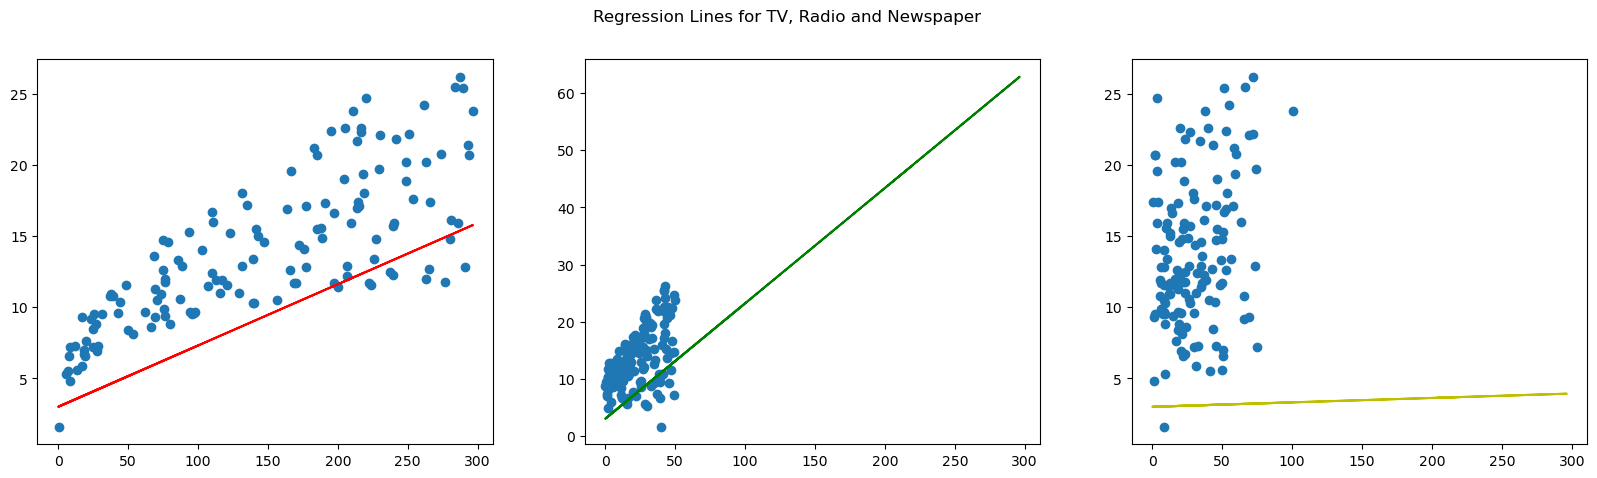

In [14]:
plt.figure(figsize=(20,5))
plt.suptitle('Regression Lines for TV, Radio and Newspaper')
for i in range(1,2):
    plt.subplot(1,3,i)
    plt.scatter(xf_train.values[:,0],yf_train)
    plt.plot(xf_train, 3.004832 + 0.043071*xf_train, 'r')
    plt.subplot(1,3,i+1)
    plt.scatter(xf_train.values[:,1],yf_train)
    plt.plot(xf_train, 3.004832 + 0.201947*xf_train, 'g')
    plt.subplot(1,3,i+2)
    plt.scatter(xf_train.values[:,2],yf_train)
    plt.plot(xf_train, 3.004832 + 0.003105*xf_train, 'y')
    plt.plot()
    break